In [1]:
%env PYTORCH_ENABLE_MPS_FALLBACK=1

env: PYTORCH_ENABLE_MPS_FALLBACK=1


In [9]:
import matplotlib.pyplot as plt
from utils.operators import ID, TopK, HOSVD, TuckerOp, TTSVD, NaturalDithering
from utils.train import run_training
from utils.graphs import plot_training_results


compression_operators = {
    'Id': (ID(), 0),
    # 'TopK': (TopK(0.1), 0), # TODO в доле писать
    'Tucker': (TuckerOp(), 0),
    'TT_SVD': (TTSVD(), 0), # TODO ранги писать, запустить
    'HOSVD': (HOSVD(), 0), 
    'Nat. Dith.': (NaturalDithering(n=15), 0),
    # TODO округления
}


In [3]:
for name, (op, num_epochs) in compression_operators.items():
    run_training(
        compression_op_name=name, 
        compression_op=op, 
        num_epochs=num_epochs,
        device='cuda'
    )


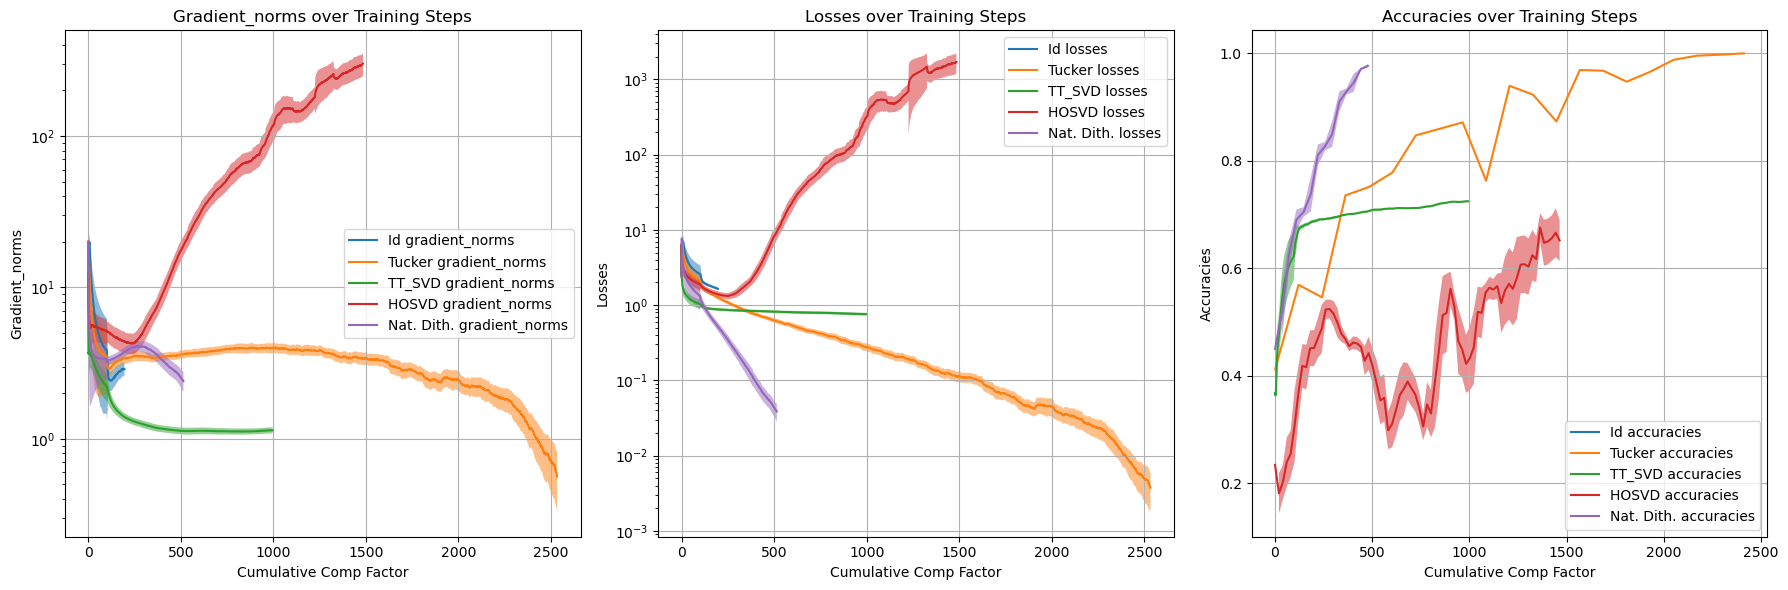

In [10]:
plot_training_results(compression_operators) # TODO скользящее среднее